In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
import os

from PIL import Image


#Exploring the hyperspectral data
## download the Augsburg dataset and put it under the dataset_benchmark_Augsburg folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
#os.chdir("/content/gdrive/My Drive/berlin_dataset/")

%cd "/content/gdrive/My Drive/dataset_benchmark_Augsburg/"

Mounted at /content/gdrive
/content/gdrive/My Drive/dataset_benchmark_Augsburg


### Load the data

In [ ]:
!pip install scikit-learn

In [ ]:

# Load the .mat file
mat_data = scipy.io.loadmat('data_HS_LR.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
HSI_data = mat_data['data_HS_LR']


dict_keys(['__header__', '__version__', '__globals__', 'data_HS_LR'])


In [ ]:
print(mat_data['__header__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue May 18 19:34:29 2021'


In [ ]:
HSI_data = HSI_data.astype(np.float32)

In [ ]:
HSI_data.dtype

dtype('float32')

In [ ]:

# Load the .mat file
mat_data = scipy.io.loadmat('data_SAR_HR.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
SAR_data= mat_data['data_SAR_HR']

dict_keys(['__header__', '__version__', '__globals__', 'data_SAR_HR'])


In [ ]:
# Load the .mat file
mat_data = scipy.io.loadmat('TrainImage.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
train_label= mat_data['TrainImage']

dict_keys(['__header__', '__version__', '__globals__', 'TrainImage'])


In [ ]:
train_label.dtype

dtype('uint8')

In [ ]:
# Load the .mat file
mat_data = scipy.io.loadmat('TestImage.mat')
#print out the varialbe of .mat data
print(mat_data.keys())
test_label = mat_data['TestImage']

dict_keys(['__header__', '__version__', '__globals__', 'TestImage'])


check unique elements

In [ ]:
def check_unique_elements(input_array):
  unique_elements, counts = np.unique(input_array, return_counts=True)
  # Print the counts of each unique element
  for element, count in zip(unique_elements, counts):
    print("Element:", int(element), "Count:", count)


In [ ]:
check_unique_elements(train_label)


Element: 0 Count: 160259
Element: 1 Count: 146
Element: 2 Count: 264
Element: 3 Count: 21
Element: 4 Count: 248
Element: 5 Count: 52
Element: 6 Count: 7
Element: 7 Count: 23


In [ ]:
check_unique_elements(test_label)

# plot legend

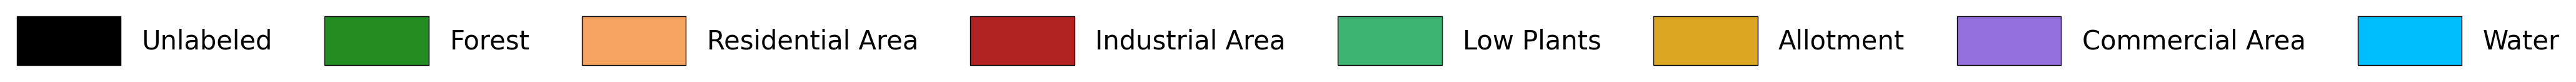

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Define the colors and labels for the legend
legend_elements = [
    Patch(facecolor='#000000', edgecolor='black', label='Unlabeled'),
    Patch(facecolor='#228B22', edgecolor='black', label='Forest'),
    Patch(facecolor='#F4A460', edgecolor='black', label='Residential Area'),
    Patch(facecolor='#B22222', edgecolor='black', label='Industrial Area'),
    Patch(facecolor='#3CB371', edgecolor='black', label='Low Plants'),
    Patch(facecolor='#DAA520', edgecolor='black', label='Allotment'),
    Patch(facecolor='#9370DB', edgecolor='black', label='Commercial Area'),
    Patch(facecolor='#00BFFF', edgecolor='black', label='Water'),
]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 0.5))  # Adjust the size of the figure as needed

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='center', fontsize=30, frameon=False, ncol=len(legend_elements),handleheight=2.5, handlelength=4, bbox_to_anchor=(0.5, -0.1), bbox_transform=fig.transFigure)

# Remove the axes
ax.axis('off')
# Remove the border
plt.gca().set_frame_on(False)

# Save the legend as an image
plt.savefig('legend_horizontal.pdf', format='pdf', bbox_inches='tight')
# Display the plot
plt.show()

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))  # Adjust figsize to suit your needs

# Plot data on each subplot
# First subplot
axs[0].imshow(train_label, cmap = cmap, interpolation='nearest')  # Example plot data
axs[0].set_title('train_label')

# Second subplot
axs[1].imshow(test_label,cmap = cmap,interpolation='nearest' )  # Example plot data
axs[1].set_title('valdiation label  map')
plt.tight_layout()
plt.show()

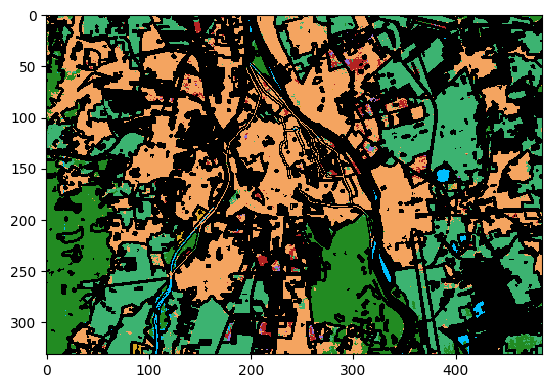

In [ ]:
# 2nd subplot
plt.imshow(masked_inference_map ,cmap = cmap ,interpolation='nearest' )  # Example plot data

## Show RGB color image ,assuming Red the 21 th channel, Green is the 11 th channel, and Blue is the 6th channel

600nm rband 34th , 550 16th nm green band, 450 blue bands 5th, try th combination of

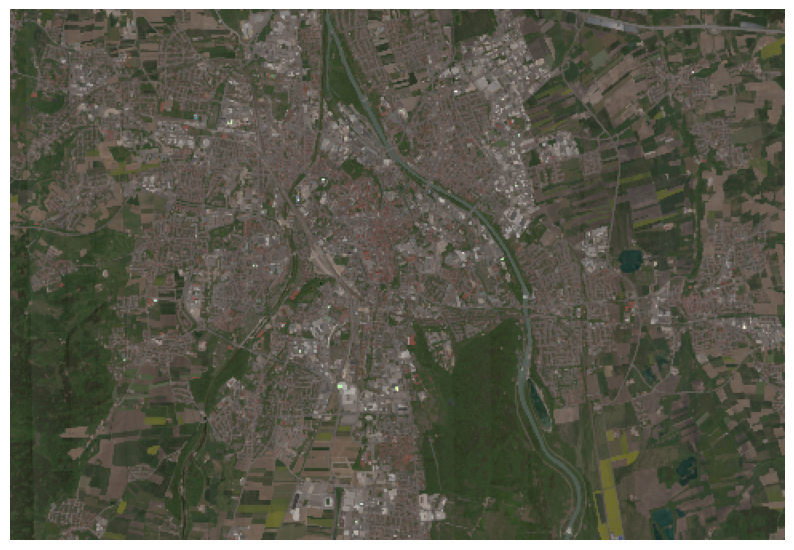

In [ ]:
# Extract the RGB channels
red = HSI_data[:, :, 21]  #  Red
green = HSI_data[:, :,11]  #  Green
blue = HSI_data[:, :,6]  #  Blue

# Stack the single channels together to make an RGB image
rgb_image = np.stack((red, green, blue), axis=-1)

# Normalize the RGB image to the 0-1 range if not already

# Normalize the image data to 0-1 for floating point or 0-255 for uint8
rgb_image_normalized = (rgb_image - np.min(rgb_image)) / (np.max(rgb_image) - np.min(rgb_image))
if rgb_image.dtype == np.uint8:
    rgb_image_normalized = (rgb_image_normalized * 255).astype(np.uint8)
gamma_coeff = 0.4
gamma_corrected= np.power(rgb_image_normalized, gamma_coeff)  # Apply gamma correction
#rgb_image_normalized = rgb_image / np.max(rgb_image)

# Display the RGB image
#plt.imshow(rgb_image_normalized)

plt.figure(figsize=(10, 10))
plt.imshow(gamma_corrected)
plt.axis('off')
# Save the plot without borders
plt.savefig('RGB.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.show()


In [ ]:
gamma_corrected.shape


(332, 485, 3)

In [ ]:
rgb_patch_normalized_pil = (gamma_corrected * 255).astype(np.uint8)  # Scale to 0-255

img = Image.fromarray(rgb_patch_normalized_pil)

In [ ]:
img.size

(485, 332)

# Divide hyperspectal image and its label with overlapping

### create folder Augsburg_train_data_32
###  divided train pathches will be put in this folder

In [ ]:

current_dir = os.getcwd()
print(current_dir)
folder_name = 'Augsburg_train_data_32'
# Construct the path
Augsburg_64_train_data_32= os.path.join(current_dir, folder_name)
os.makedirs(Augsburg_64_train_data_32, exist_ok=True)
print(Augsburg_64_train_data_32) #save divided hyperspectral cube data and rgb patches into traiinng folder

/content/gdrive/MyDrive/dataset_benchmark_Augsburg
/content/gdrive/MyDrive/dataset_benchmark_Augsburg/Augsburg_train_data_32


##create folder Augsburg_test_data_32
## divided test patches will be put in this folder

In [ ]:
current_dir = os.getcwd()
print(current_dir)

folder_name = 'Augsburg_test_data_32'
# Construct the path
Augsburg_test_data_32 = os.path.join(current_dir, folder_name)
os.makedirs(Augsburg_test_data_32, exist_ok=True)
print(Augsburg_test_data_32) #save divided patches into folder "hyperspectral_traninning_64"

/content/gdrive/MyDrive/dataset_benchmark_Augsburg
/content/gdrive/MyDrive/dataset_benchmark_Augsburg/Augsburg_test_data_32


# divide Augsburg hyperspectral big rgb image into 64by64 patches with overlapping 32
original width: 485 ,
original height : 332,
adjusted width :512 ,
adjusted height : 352,

alltother divided into 150 patches

In [ ]:
import pdb
def divide_into_patches_with_reflect_padding(image, label, train_data_244,output_folder ,patch_size=64, overlap=32):

    stride = patch_size - overlap
    original_width, original_height = image.size
    # Calculate necessary padding to fit stride

    adjusted_width =((original_width - patch_size) // stride + 1) * stride + patch_size
    adjusted_height = ((original_height - patch_size) // stride + 1) * stride + patch_size

    print(f"original_width : {original_width}, original height: {original_height}")
    print(f"adjusted_width: {adjusted_width} , adjusted_height: {adjusted_height}")

    padded_horizontal = adjusted_width- original_width
    padded_vertical= adjusted_height- original_height

    padded_image = Image.new("RGB", (adjusted_width, adjusted_height), (0, 0, 0))

    # Paste the original image onto the padded image with the desired offset
    padded_image.paste(image, (padded_horizontal, padded_vertical))
    padded_image = np.array(padded_image)

    padded_label = np.pad(label, ((padded_vertical, 0), (padded_horizontal, 0)),mode='constant', constant_values=0)

    #setting pad_width for train_data cube data
    pad_width = ((0, 0),  # No padding for the first dimension
             (padded_vertical,0),  # Add 3 rows at the end of the second dimension
             (padded_horizontal, 0)) # Add 15 columns at the end of the third dimension

    padded_train_data= np.pad(train_data_244,pad_width,mode='constant', constant_values=0)


    patch_number = 0

    # Generate patches
    for i in range(0, padded_image.shape[0] - patch_size + 1, stride):
        for j in range(0, padded_image.shape[1] - patch_size + 1, stride):
            patch_img = padded_image[i:i + patch_size, j:j + patch_size]
            patch_label = padded_label[i:i + patch_size, j:j + patch_size]
            patch_train_data = padded_train_data[:,i:i + patch_size, j:j + patch_size]

            # Format the filename with leading zeros and a unique patch number
            filename_img = f"{output_folder}/hyperspectral{patch_number}.png"
            filename_label = f"{output_folder}/hyperspectral{patch_number}.npy"
            filename_train_data = f"{output_folder}/hyperspectral{patch_number}.npz"

            patch_img = Image.fromarray(patch_img)
            patch_img.save(filename_img)
            np.save(filename_label,patch_label)
            np.savez(filename_train_data,arr1= patch_train_data)
            patch_number += 1

    return patch_number



**pay attention** In the UH dataset, the first dimension is band channels while in Berlin dataset the third dimension is band channels

In [ ]:
hsi_data = HSI_data.transpose(2,0,1) # swith channels

In [ ]:
hsi_data.shape

(180, 332, 485)

## divide for train set and test set

##save train data to Augsburg_64_train_data_32 folder
## save test data t o Augsburg_64_test_data_32 folder

In [ ]:
Augsburg_64_train_data_32

'/content/gdrive/MyDrive/dataset_benchmark_Augsburg/Augsburg_train_data_32'

In [ ]:
train_label.shape

(332, 485)

In [ ]:
patches_num = divide_into_patches_with_reflect_padding(img,train_label,hsi_data, Augsburg_64_train_data_32, 64, 32)

print("Number of patches:", patches_num)

original_width : 485, original height: 332
adjusted_width: 512 , adjusted_height: 352
Number of patches: 150


In [ ]:
Augsburg_test_data_32

'/content/gdrive/MyDrive/dataset_benchmark_Augsburg/Augsburg_test_data_32'

In [ ]:
patches_num = divide_into_patches_with_reflect_padding(img,test_label,hsi_data, Augsburg_test_data_32, 64, 32)

print("Number of patches:", patches_num)

original_width : 485, original height: 332
adjusted_width: 512 , adjusted_height: 352
Number of patches: 150
